(60000,)


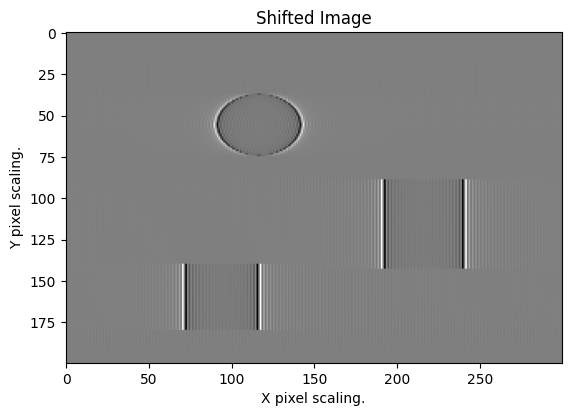

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal.windows import lanczos

data = np.fromfile("../Images/data_rectangle.raw", dtype=np.float32)

# data = np.reshape(data, (200,300))

print(data.shape)

# N = data.shape[0] * data.shape[1]
N = len(data)

G = np.zeros(N, dtype=complex)
# G = np.fft.fft2(data)
G = np.fft.fft(data)
# print(G)

delta = 45.5

N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    G[k] = np.exp(-2j * np.pi * delta * k / N) * G[k]
for k in range(int(N_prime/2), N):
    G[k] = np.exp(-2j * np.pi * delta * (k - N) / N) * G[k]
    
for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        G[k] = np.exp(1j*np.pi * (delta % 1)) * G[k]
    else:
        G[k] = G[k] 
        

# window = lanczos(N,sym=False)

# G *= window
        
    
final_output = np.zeros(N, dtype=complex)
# final_output = np.fft.ifft2(G)
final_output = np.fft.ifft(G)

# final_output = np.reshape(final_output.real,(200,300))

plt.title("Shifted Image")
plt.xlabel("X pixel scaling.")
plt.ylabel("Y pixel scaling.")
final_output = np.reshape(final_output, (200,300))

# Visualize the data as an image
plt.imshow(final_output.real, cmap='gray')
# plt.imshow(np.reshape(data, (200,300)), cmap='gray')
plt.show()